In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime

%matplotlib inline

In [2]:
data = pd.read_csv("2019-Nov.csv")
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [3]:
data.shape

(67501979, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501979 entries, 0 to 67501978
Data columns (total 9 columns):
event_time       object
event_type       object
product_id       int64
category_id      int64
category_code    object
brand            object
price            float64
user_id          int64
user_session     object
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [5]:
data.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

### Know your Customers

How many customers visit the site?

In [6]:
visitor = data['user_id'].nunique()
print ("visitors: {}".format(visitor))

visitors: 3696117


### Vistors Daily Trend

Does traffic flunctuate by date?

In [7]:
data['event_date'] = data['event_time'].apply(lambda s: str(s)[0:10])
visitor_by_date = data[['event_date','user_id']].drop_duplicates().groupby(['event_date'])['user_id'].agg(['count']).sort_values(by=['event_date'], ascending=True)

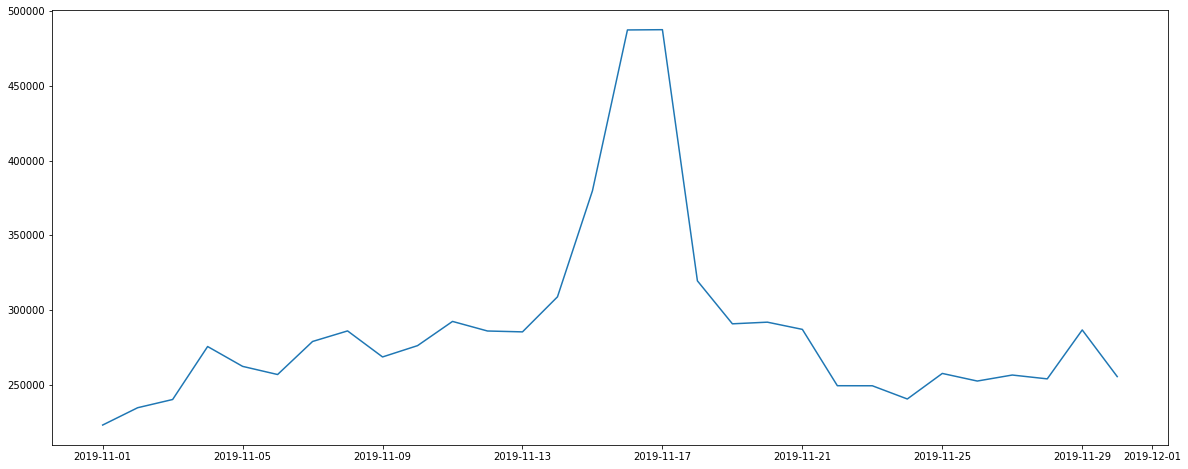

<Figure size 1440x576 with 0 Axes>

In [9]:
x = pd.Series(visitor_by_date.index.values).apply(lambda s: datetime.strptime(s, '%Y-%m-%d').date())
y = visitor_by_date['count']
plt.rcParams['figure.figsize'] = (20,8)

plt.plot(x,y)
plt.show()
plt.savefig('Vistors_Daily_Trend.png')

### By Category and Product 

Which category customers interact the most? What brand the view to most?

In [10]:
top_category = data['category_code'].value_counts()[:5].sort_values(ascending=False)
top_category.index.array

<PandasArray>
['electronics.smartphone',   'electronics.video.tv',     'computers.notebook',
     'electronics.clocks',          'apparel.shoes']
Length: 5, dtype: object

In [11]:
df_top_category = data.loc[data['category_code'].isin(top_category.index.array),:]
top_brand = df_top_category.groupby(['category_code','brand'])['user_session'].agg(['count']).sort_values(['category_code','count'], ascending=False)
top_brand.head(30)

count
category_code        brand            
electronics.video.tv samsung    771041
                     lg         351790
                     artel      311139
                     haier      127990
                     sony       123282
                     kivi        84220
                     tcl         81246
                     yasin       67876
                     xiaomi      40062
                     philips     35777
                     changhong   28155
                     toshiba     24186
                     harper      18821
                     arg         18815
                     shivaki     17431
                     ergo        12115
                     horizont    11436
                     elenberg    10206
                     blaupunkt    9995
                     vestel       8807
                     hisense      8235
                     irbis        7856
                     rebus        6588
                     bq           5126
                     jvc          3267
                     saturn       2669
                     dauscher     1963
                     dexp         1797
                     olto         1605
                     panasonic     896

### Purchase Behavior

What's the distribution of eventype?

In [12]:
data['event_type'].value_counts()

view        63556110
cart         3028930
purchase      916939
Name: event_type, dtype: int64

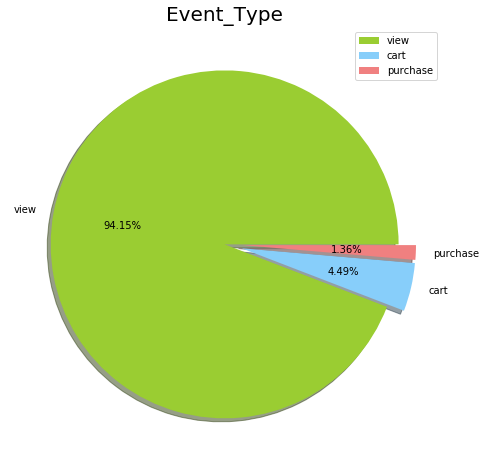

<Figure size 576x576 with 0 Axes>

In [13]:
labels = ['view', 'cart','purchase']
size = data['event_type'].value_counts()
colors = ['yellowgreen', 'lightskyblue','lightcoral']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event_Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()
plt.savefig('Event_Type_Dist.png')

#### event_type = "purchase", what item do customers buy?

In [14]:
purchase = data.loc[data['event_type'] == 'purchase']
purchase = purchase.dropna(axis='rows')
purchase

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date
168,2019-11-01 00:01:04 UTC,purchase,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d,2019-11-01
707,2019-11-01 00:04:51 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,128.42,562958505,0f039697-fedc-40fa-8830-39c1a024351d,2019-11-01
939,2019-11-01 00:06:33 UTC,purchase,1801881,2053013554415534427,electronics.video.tv,samsung,488.80,557746614,4d76d6d3-fff5-4880-8327-e9e57b618e0e,2019-11-01
942,2019-11-01 00:06:34 UTC,purchase,5800823,2053013553945772349,electronics.audio.subwoofer,nakamichi,123.56,514166940,8ef5214a-86ad-4d0b-8df3-4280dd411b47,2019-11-01
1107,2019-11-01 00:07:38 UTC,purchase,30000218,2127425436764865054,construction.tools.welding,magnetta,254.78,515240495,0253151d-5c84-4809-ba02-38ac405494e1,2019-11-01
...,...,...,...,...,...,...,...,...,...,...
67501716,2019-11-30 23:58:08 UTC,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,235.60,574868869,878a1538-ebe3-4d7f-b773-1b057b1971eb,2019-11-30
67501725,2019-11-30 23:58:14 UTC,purchase,1004874,2053013555631882655,electronics.smartphone,samsung,346.70,547804983,717566cf-ef93-4078-ba8f-169a3ac9f1a0,2019-11-30
67501745,2019-11-30 23:58:22 UTC,purchase,1005130,2053013555631882655,electronics.smartphone,apple,1437.02,515582054,829c20b5-696e-4a8a-8a9f-171014a3ecbe,2019-11-30
67501824,2019-11-30 23:58:57 UTC,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,235.60,579876821,ca50e291-43f3-4ca2-9e13-20ee6b8b25f0,2019-11-30


#### What brands the customers buy?

In [15]:
top_sellers = purchase.groupby('brand')['brand'].agg(['count']).sort_values('count', ascending=False)
top_sellers.head(20)

,count
brand,
samsung,198670
apple,165681
xiaomi,57909
huawei,23466
oppo,15080
lg,11828
artel,7269
lenovo,6546
acer,6402


### User Journey example, is it like typical funnel: view => cart => purchase ?

In [16]:
data.loc[data['user_id'] == 513351129]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date
49,2019-11-01 00:00:17 UTC,view,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d,2019-11-01
168,2019-11-01 00:01:04 UTC,purchase,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d,2019-11-01
281,2019-11-01 00:01:57 UTC,view,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,d3ff456e-0537-4c72-b126-752dd3e135db,2019-11-01
57932963,2019-11-25 09:44:42 UTC,view,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,ce2941e6-f108-4876-bb76-da3981eb92e9,2019-11-25
57933375,2019-11-25 09:44:57 UTC,cart,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,ce2941e6-f108-4876-bb76-da3981eb92e9,2019-11-25
57933966,2019-11-25 09:45:21 UTC,view,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,ce2941e6-f108-4876-bb76-da3981eb92e9,2019-11-25
57934030,2019-11-25 09:45:23 UTC,cart,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,ce2941e6-f108-4876-bb76-da3981eb92e9,2019-11-25
57935200,2019-11-25 09:46:11 UTC,purchase,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,ce2941e6-f108-4876-bb76-da3981eb92e9,2019-11-25
60185950,2019-11-26 16:05:24 UTC,view,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,543b61ca-c953-469d-95c9-71aeb2480749,2019-11-26
60188988,2019-11-26 16:06:54 UTC,cart,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,543b61ca-c953-469d-95c9-71aeb2480749,2019-11-26


### Modeling: predict at time of addition to shopping cart if user will purchase a given product or not

#### Feature engineering

Restructure the data to fee in to machine learning model. For this use case, I only target the data which customers have "put" the product in the cart.
 
Furthermore, I add some new features into training data set:

* category_code_level1: category
* category_code_level2: sub-category
* event_weekday: weekday of the event
* activity_count: number of activity in that session
* is_purchased: whether the put in cart item is purchased

Thus, the training data set contains every non-duplicated cart transaction (within the same session, I only keep one record for a particular product in the cart) with above mentioned new feature. I will use those features, including the original price and brand to predict whether customers will eventually purchase the item in the cart.

In [26]:
cart_purchase_users = data.loc[data["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['user_id'])
cart_purchase_users.dropna(how='any', inplace=True)

In [27]:
cart_purchase_users_all_activity = data.loc[data['user_id'].isin(cart_purchase_users['user_id'])]

Prepare a dataframe for counting activity in the session

In [28]:
activity_in_session = cart_purchase_users_all_activity.groupby(['user_session'])['event_type'].count().reset_index()
activity_in_session = activity_in_session.rename(columns={"event_type": "activity_count"})

In [29]:
df_targets = data.loc[data["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['event_type', 'product_id','price', 'user_id',
'user_session'])
df_targets["is_purchased"] = np.where(df_targets["event_type"]=="purchase",1,0)
df_targets["is_purchased"] = df_targets.groupby(["user_session","product_id"])["is_purchased"].transform("max")
df_targets = df_targets.loc[df_targets["event_type"]=="cart"].drop_duplicates(["user_session","product_id","is_purchased"])
df_targets['event_weekday'] = df_targets['event_time'].apply(lambda s: str(datetime.strptime(str(s)[0:10], "%Y-%m-%d").weekday()))
df_targets.dropna(how='any', inplace=True)
df_targets["category_code_level1"] = df_targets["category_code"].str.split(".",expand=True)[0].astype('category')
df_targets["category_code_level2"] = df_targets["category_code"].str.split(".",expand=True)[1].astype('category')

In [30]:
df_targets = df_targets.merge(activity_in_session, on='user_session', how='left')
df_targets['activity_count'] = df_targets['activity_count'].fillna(0)
df_targets.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,is_purchased,event_weekday,category_code_level1,category_code_level2,activity_count
0,2019-11-01 00:00:14 UTC,cart,1005014,2053013555631882655,electronics.smartphone,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a,2019-11-01,0.0,4,electronics,smartphone,1.0
1,2019-11-01 00:03:24 UTC,cart,1801881,2053013554415534427,electronics.video.tv,samsung,488.80,557746614,4d76d6d3-fff5-4880-8327-e9e57b618e0e,2019-11-01,1.0,4,electronics,video,25.0
2,2019-11-01 00:03:39 UTC,cart,1005115,2053013555631882655,electronics.smartphone,apple,949.47,565865924,fd4bd6d4-bd14-4fdc-9aff-bd41a594f82e,2019-11-01,0.0,4,electronics,smartphone,2.0
3,2019-11-01 00:05:54 UTC,cart,1002542,2053013555631882655,electronics.smartphone,apple,486.80,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,2019-11-01,0.0,4,electronics,smartphone,14.0
4,2019-11-01 00:06:38 UTC,cart,1004856,2053013555631882655,electronics.smartphone,samsung,128.42,513645631,61ceaf50-820a-4858-9a68-bab804d47a22,2019-11-01,1.0,4,electronics,smartphone,9.0


In [31]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1408569 entries, 0 to 1408568
Data columns (total 15 columns):
event_time              1408569 non-null object
event_type              1408569 non-null object
product_id              1408569 non-null int64
category_id             1408569 non-null int64
category_code           1408569 non-null object
brand                   1408569 non-null object
price                   1408569 non-null float64
user_id                 1408569 non-null int64
user_session            1408569 non-null object
event_date              1408569 non-null object
is_purchased            1408569 non-null float64
event_weekday           1408569 non-null object
category_code_level1    1408569 non-null category
category_code_level2    1408569 non-null category
activity_count          1408569 non-null float64
dtypes: category(2), float64(3), int64(3), object(7)
memory usage: 153.1+ MB


#### Save new data structure for modeling

In [2]:
df_targets.to_csv('training_data.csv')
df_targets = pd.read_csv('training_data.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from sklearn.utils import resample
from sklearn import metrics

#### Resampling training set

In [4]:
is_purcahase_set = df_targets[df_targets['is_purchased']== 1]
is_purcahase_set.shape[0]

522866

In [5]:
not_purcahase_set = df_targets[df_targets['is_purchased']== 0]
not_purcahase_set.shape[0]

885703

In [6]:
n_samples = 100000
is_purchase_downsampled = resample(is_purcahase_set,
                                replace = False, 
                                n_samples = n_samples,
                                random_state = 27)
not_purcahase_set_downsampled = resample(not_purcahase_set,
                                replace = False,
                                n_samples = n_samples,
                                random_state = 27)

In [7]:
downsampled = pd.concat([is_purchase_downsampled, not_purcahase_set_downsampled])
downsampled['is_purchased'].value_counts()

0.0    100000
1.0    100000
Name: is_purchased, dtype: int64

In [8]:
features = downsampled[['brand', 'price', 'event_weekday', 'category_code_level1', 'category_code_level2', 'activity_count']]

#### Encode categorical variables

In [9]:
features.loc[:,'brand'] = LabelEncoder().fit_transform(downsampled.loc[:,'brand'].copy())
features.loc[:,'event_weekday'] = LabelEncoder().fit_transform(downsampled.loc[:,'event_weekday'].copy())
features.loc[:,'category_code_level1'] = LabelEncoder().fit_transform(downsampled.loc[:,'category_code_level1'].copy())
features.loc[:,'category_code_level2'] = LabelEncoder().fit_transform(downsampled.loc[:,'category_code_level2'].copy())

is_purchased = LabelEncoder().fit_transform(downsampled['is_purchased'])
features.head()

,brand,price,event_weekday,category_code_level1,category_code_level2,activity_count
235095,808,95.24,1,1,35,9.0
1104998,2,1002.60,3,4,29,5.0
1268236,844,168.69,2,7,40,20.0
103485,58,500.63,4,7,40,8.0
798825,844,244.02,6,7,40,8.0


In [10]:
print(list(features.columns))

['brand', 'price', 'event_weekday', 'category_code_level1', 'category_code_level2', 'activity_count']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    is_purchased, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

In [12]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("fbeta:",metrics.fbeta_score(y_test, y_pred, average='weighted', beta=0.5))

Accuracy: 0.6795166666666667
Precision: 0.6570988932946676
Recall: 0.7439943712935974
fbeta: 0.6803005121022703


#### Feature importance

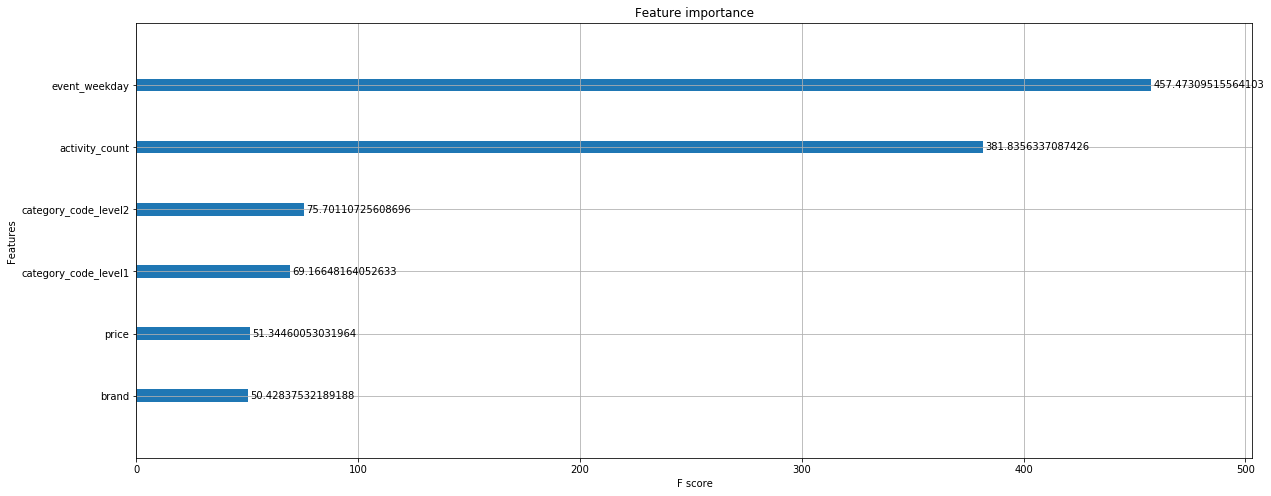

In [16]:
plot_importance(model, max_num_features=10, importance_type ='gain')
plt.rcParams['figure.figsize'] = (8,8)
plt.show()

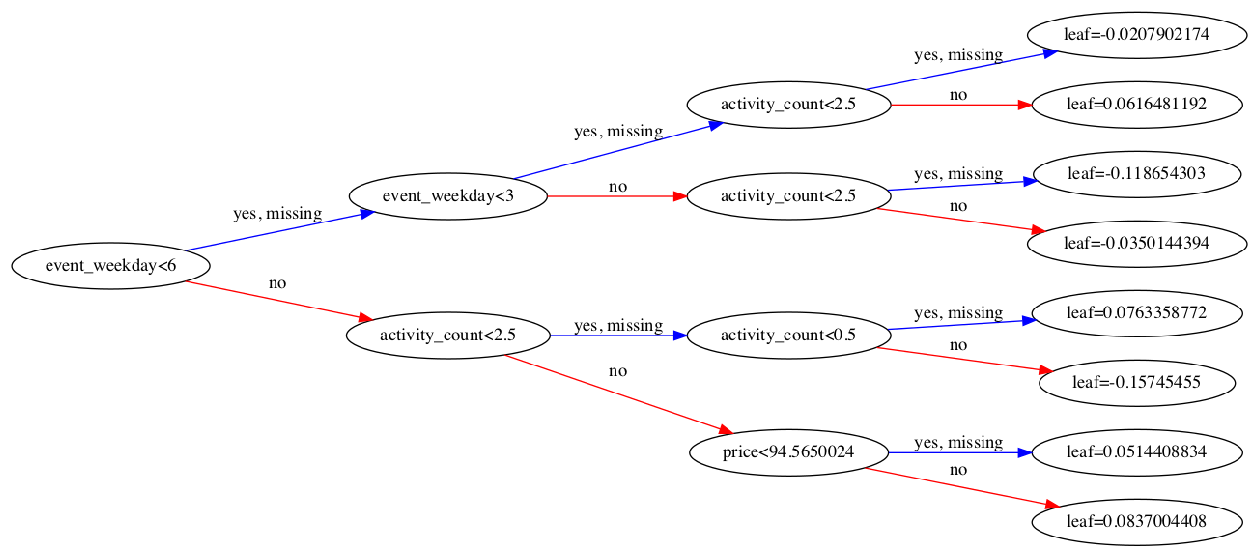

In [19]:
from xgboost import plot_tree
plot_tree(model, num_trees=0, rankdir='LR')
plt.rcParams['figure.figsize'] = (40,8)
plt.show()

In [20]:
plt.savefig('Tree_model.png')

<Figure size 2880x576 with 0 Axes>